# Imports

In [1]:
import snbins
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Generate Data

In [3]:
npoints = 105
x = np.random.normal(0,10,npoints)
y = np.random.normal(0,10,npoints)

In [4]:
# Number of bins
nbin = 10

Text(0, 0.5, 'Y')

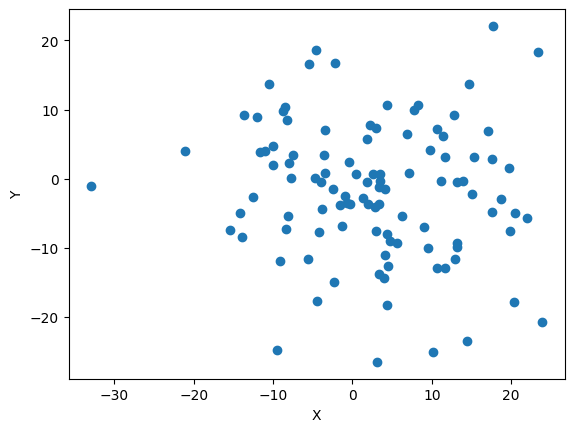

In [5]:
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')

In [6]:
# Ascending Bins

In [7]:
bin_edges, bin_centers = snbins.sn_bins(x,nbin,order='asc')

In [8]:
nbin, len(bin_edges), len(bin_centers)

(10, 11, 10)

In [9]:
count,_,_ = stats.binned_statistic(x, y, statistic='count', bins=bin_edges)
mean,_,_ = stats.binned_statistic(x, y, statistic='mean', bins=bin_edges)
std,_,_ = stats.binned_statistic(x, y, statistic='std', bins=bin_edges)
sem = std/np.sqrt(count)

Text(0, 0.5, 'avg. Y')

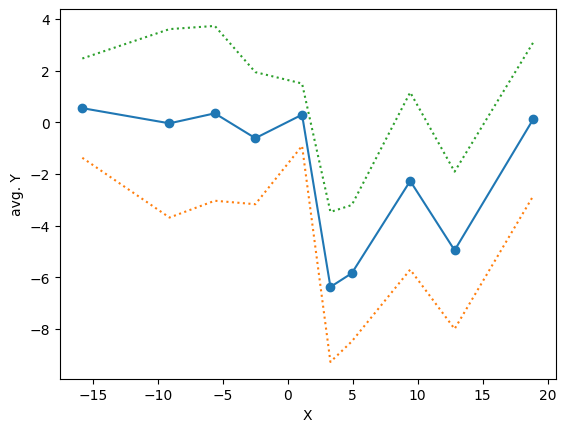

In [10]:
plt.plot(bin_centers,mean,marker='o')
plt.plot(bin_centers,mean-sem,ls='dotted')
plt.plot(bin_centers,mean+sem,ls='dotted')
plt.xlabel('X')
plt.ylabel('avg. Y')

Text(0, 0.5, 'Size of Each Bin')

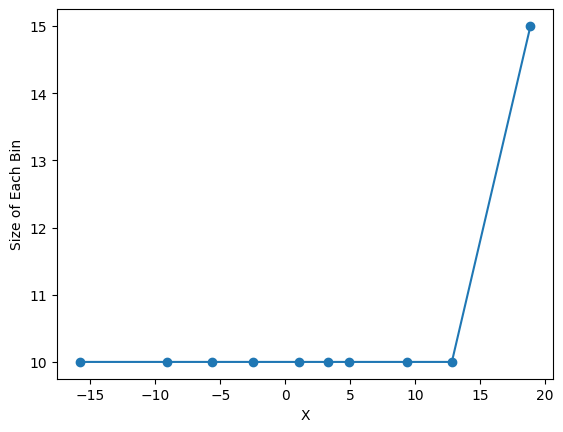

In [11]:
plt.plot(bin_centers,count,marker='o')
plt.xlabel('X')
plt.ylabel('Size of Each Bin')

In [12]:
# Decending Bins

In [13]:
bin_edges, bin_centers = snbins.sn_bins(x,nbin,order='des')

In [14]:
count,_,_ = stats.binned_statistic(x, y, statistic='count', bins=bin_edges)
mean,_,_ = stats.binned_statistic(x, y, statistic='mean', bins=bin_edges)
std,_,_ = stats.binned_statistic(x, y, statistic='std', bins=bin_edges)
sem = std/np.sqrt(count)

Text(0, 0.5, 'avg. Y')

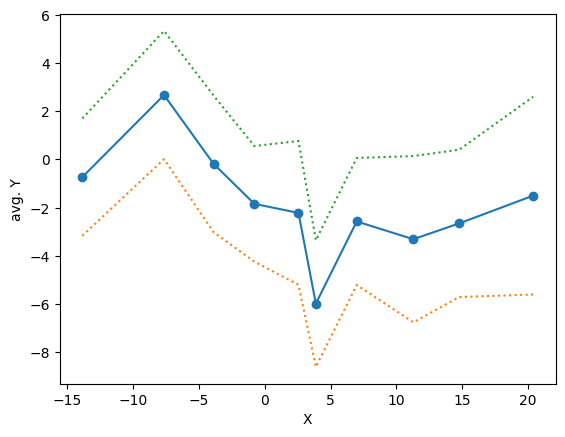

In [15]:
plt.plot(bin_centers,mean,marker='o')
plt.plot(bin_centers,mean-sem,ls='dotted')
plt.plot(bin_centers,mean+sem,ls='dotted')
plt.xlabel('X')
plt.ylabel('avg. Y')

Text(0, 0.5, 'Size of Each Bin')

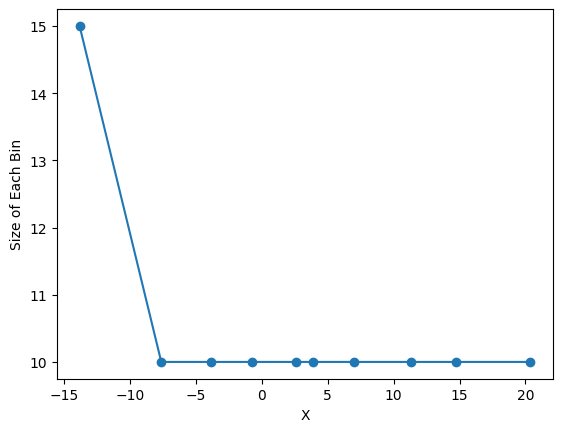

In [16]:
plt.plot(bin_centers,count,marker='o')
plt.xlabel('X')
plt.ylabel('Size of Each Bin')

# leftover arguements

In [17]:
# leftover = 'drop'

In [18]:
bin_edges, bin_centers = snbins.sn_bins(x, nbin, order='asc', leftover='drop')

In [19]:
nbin, len(bin_edges), len(bin_centers)

(10, 11, 10)

In [20]:
count,_,_ = stats.binned_statistic(x, None, statistic='count', bins=bin_edges)

Text(0, 0.5, 'Size of Each Bin')

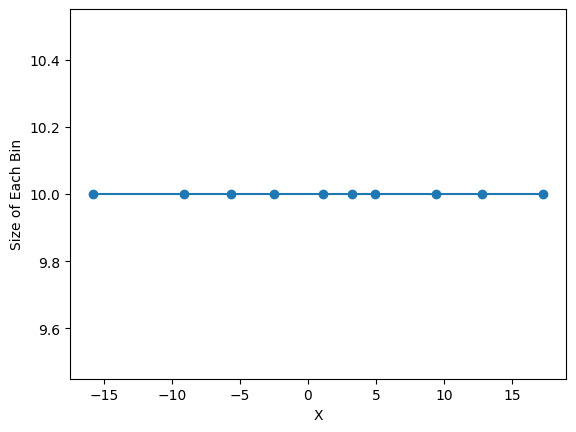

In [21]:
plt.plot(bin_centers,count,marker='o')
plt.xlabel('X')
plt.ylabel('Size of Each Bin')

In [22]:
# leftover = None

In [23]:
bin_edges, bin_centers = snbins.sn_bins(x, nbin, order='asc', leftover=None)

In [24]:
nbin, len(bin_edges), len(bin_centers)

(10, 12, 11)

In [25]:
count,_,_ = stats.binned_statistic(x, None, statistic='count', bins=bin_edges)

Text(0, 0.5, 'Size of Each Bin')

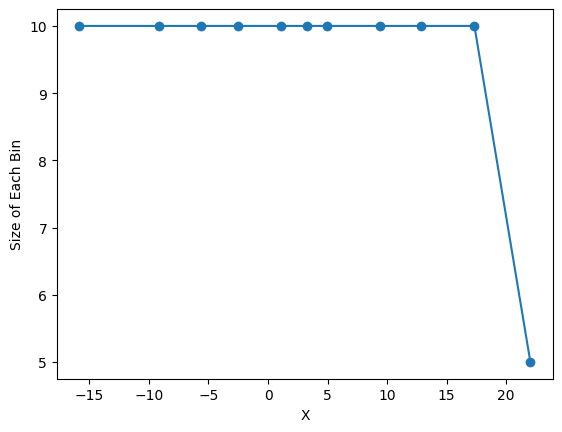

In [26]:
plt.plot(bin_centers,count,marker='o')
plt.xlabel('X')
plt.ylabel('Size of Each Bin')

# Bin Centering

In [27]:
bin_edges, bin_cent_mid = snbins.sn_bins(x, nbin, order='asc', leftover='drop', cent='mid')
bin_edges, bin_cent_avg = snbins.sn_bins(x, nbin, order='asc', leftover='drop', cent='avg')
mean,_,_ = stats.binned_statistic(x, y, statistic='mean', bins=bin_edges)

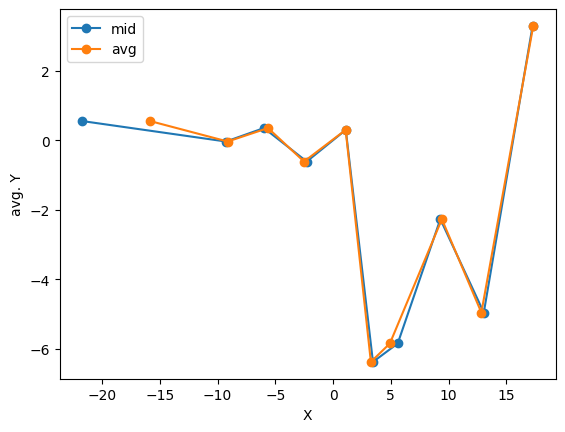

In [28]:
plt.plot(bin_cent_mid,mean,marker='o',label='mid')
plt.plot(bin_cent_avg,mean,marker='o',label='avg')
plt.xlabel('X')
plt.ylabel('avg. Y')
plt.legend()

In [29]:
# uncertainty

In [30]:
bin_edges, bin_cent_avg, bin_cent_err = snbins.sn_bins(x, nbin, order='asc', leftover='drop', cent='avg', rtn_xerr=True)

In [31]:
mean,_,_ = stats.binned_statistic(x, y, statistic='mean', bins=bin_edges)
std,_,_ = stats.binned_statistic(x, y, statistic='std', bins=bin_edges)
count,_,_ = stats.binned_statistic(x, y, statistic='count', bins=bin_edges)

In [32]:
yerr = std/np.sqrt(count)

Text(0, 0.5, 'avg. Y')

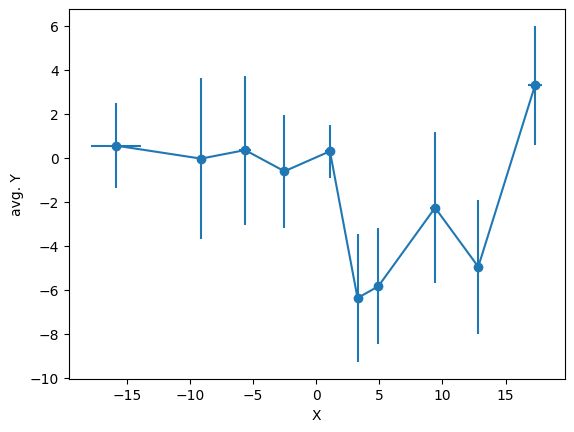

In [33]:
plt.errorbar(bin_cent_avg,mean,marker='o',xerr=bin_cent_err,yerr=yerr)
plt.xlabel('X')
plt.ylabel('avg. Y')